<a href="https://colab.research.google.com/github/muzakkialfarisi/MACHINE-LEARNING/blob/master/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT**
library yang terdapat pada python

In [ ]:
from gensim.test.utils import datapath
from gensim import utils
from google.colab import drive
drive.mount('drive/')
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import glob2
import gensim.models

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


**Class MyCorpus bertujuan untuk memproses data teks yang akan digunakan sebagai sumber data latih membuat model word2vec.**

In [ ]:
class MyCorpus(object): 
    """An interator that yields sentences (lists of str)."""
    
    def __iter__(self):
        filenames = glob2.glob('drive/My Drive/Colab Notebooks/NLP/DataTrain/*.txt')
        with open('drive/My Drive/Colab Notebooks/NLP/gabung.txt', 'w') as f:
            for file in filenames:
                with open(file) as infile:
                    f.write(infile.read()+'\n')
        f.close()
        
        corpus_path =  'drive/My Drive/Colab Notebooks/NLP/gabung.txt'  # sesuaikan dengan path masing-masing
        
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            # asumsi 1 dokumen adalah 1 kalimat, dituliskan per baris. Antar token dipisahkan dengan spasi
            yield utils.simple_preprocess(line)

**Fungsi untuk reduksi dimensi, supaya lebih mudah dimengerti.**

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

**Fungsi untuk visualisasi dengan matplotlib**

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)
    #
    # Label randomly subsampled 50 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 50)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

**Pemanggilan**

In [ ]:
sentences = MyCorpus()

**Model 1**

In [ ]:
model1 = gensim.models.Word2Vec(sentences=sentences, min_count=1, window=2)

2020-10-08 15:29:55,457 : INFO : collecting all words and their counts
2020-10-08 15:29:55,577 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-08 15:29:55,642 : INFO : collected 6041 word types from a corpus of 41861 raw words and 2273 sentences
2020-10-08 15:29:55,643 : INFO : Loading a fresh vocabulary
2020-10-08 15:29:55,656 : INFO : effective_min_count=1 retains 6041 unique words (100% of original 6041, drops 0)
2020-10-08 15:29:55,662 : INFO : effective_min_count=1 leaves 41861 word corpus (100% of original 41861, drops 0)
2020-10-08 15:29:55,687 : INFO : deleting the raw counts dictionary of 6041 items
2020-10-08 15:29:55,689 : INFO : sample=0.001 downsamples 49 most-common words
2020-10-08 15:29:55,691 : INFO : downsampling leaves estimated 36835 word corpus (88.0% of prior 41861)
2020-10-08 15:29:55,704 : INFO : estimated required memory for 6041 words and 100 dimensions: 7853300 bytes
2020-10-08 15:29:55,710 : INFO : resetting layer weights
2

**MOdel 2**

In [ ]:
model2 = gensim.models.Word2Vec(sentences=sentences, min_count=5, window=2)

2020-10-08 15:29:58,117 : INFO : collecting all words and their counts
2020-10-08 15:29:58,219 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-08 15:29:58,283 : INFO : collected 6041 word types from a corpus of 41861 raw words and 2273 sentences
2020-10-08 15:29:58,284 : INFO : Loading a fresh vocabulary
2020-10-08 15:29:58,291 : INFO : effective_min_count=5 retains 1474 unique words (24% of original 6041, drops 4567)
2020-10-08 15:29:58,296 : INFO : effective_min_count=5 leaves 34169 word corpus (81% of original 41861, drops 7692)
2020-10-08 15:29:58,302 : INFO : deleting the raw counts dictionary of 6041 items
2020-10-08 15:29:58,307 : INFO : sample=0.001 downsamples 59 most-common words
2020-10-08 15:29:58,308 : INFO : downsampling leaves estimated 28249 word corpus (82.7% of prior 34169)
2020-10-08 15:29:58,315 : INFO : estimated required memory for 1474 words and 100 dimensions: 1916200 bytes
2020-10-08 15:29:58,316 : INFO : resetting layer weigh

In [ ]:
# model 1
vec1 = model1.wv['indonesia']
print(vec1)

[-0.11741901 -0.01727962  0.03019703  0.02705113  0.09871952  0.05915259
 -0.07951028  0.01045192  0.18113619 -0.28801522  0.40604717  0.29407948
  0.12724371  0.11059812 -0.25956368  0.1377      0.02383315 -0.09804305
 -0.3144929   0.44412622  0.25558174  0.3319748   0.33995178 -0.13289092
  0.00524618  0.02096261  0.23952836 -0.12668385  0.00139965 -0.54873365
 -0.27827728 -0.469437    0.16395521 -0.13434173  0.3527944   0.04367932
 -0.3547261   0.06750461 -0.22823097  0.35087484  0.08409077 -0.17853017
 -0.18072562  0.1935544   0.12391385 -0.04284838  0.27196276 -0.04103668
  0.4399061   0.02879629  0.42154133  0.21998371  0.11535875 -0.081613
  0.26835817  0.2070816   0.05393099  0.3211195   0.2043266   0.17991784
 -0.38371935 -0.24152958 -0.09602761 -0.31517324 -0.1763962   0.14548278
  0.08903169  0.38115075  0.27501962 -0.02113614  0.36685014  0.16365074
 -0.18624397 -0.01488191  0.24750356 -0.02004363  0.327776    0.22159855
 -0.043998    0.21462685 -0.02578698 -0.5334737  -0.1

In [ ]:
# model 2
vec2 = model2.wv['indonesia']
print(vec2)

[-0.10352777 -0.04802888 -0.14585266  0.1741509   0.02521934 -0.07921509
 -0.07407647 -0.05878272  0.28941253 -0.3831068   0.6483895   0.18190254
  0.08684743  0.1992398  -0.34740406  0.3220325   0.00224142 -0.24133837
 -0.37336534  0.3481755   0.30769706  0.52294064  0.32867345 -0.0755355
 -0.15743321  0.06568465  0.3765998  -0.32993513  0.03843988 -0.60602164
 -0.45383075 -0.509239    0.30641332 -0.21323024  0.46140867  0.1879876
 -0.4467823   0.14622453 -0.11615016  0.50069046  0.02483186 -0.29966348
 -0.32636285  0.22304861  0.13885273  0.01461109  0.22520605 -0.04519713
  0.61222214  0.17979401  0.3322187   0.28220114  0.24966173 -0.17060256
  0.3014408   0.29274443  0.13380863  0.42880905  0.38785842  0.28503683
 -0.45331088 -0.19520776 -0.1279749  -0.16988799 -0.25880915  0.28537872
  0.110159    0.5041967   0.32623234 -0.08546031  0.39781892  0.20396067
 -0.21654816 -0.04147051  0.4598678  -0.01734904  0.5062415   0.08334465
 -0.2895736   0.11803751 -0.03729053 -0.5852597  -0.0

In [ ]:
# model 1
print(model1.wv.similarity('sehat', 'fit'))
print(model1.wv.similarity('indonesia', 'jepang'))
print(model1.wv.similarity('covid', 'virus'))

0.9670549
0.9655482
0.99422675


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# model 2
print(model2.wv.similarity('sehat', 'fit'))
print(model2.wv.similarity('indonesia', 'jepang'))
print(model2.wv.similarity('covid', 'virus'))

0.9962526
0.9908214
0.99928856


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# model 1
print(model1.wv.most_similar(positive=['indonesia'], topn=5))

2020-10-08 15:29:59,704 : INFO : precomputing L2-norms of word weight vectors


[('yang', 0.9998530149459839), ('dan', 0.9998488426208496), ('di', 0.9998437762260437), ('dari', 0.9998291730880737), ('dalam', 0.999826967716217)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# model 1
print(model1.wv.most_similar(negative=['indonesia'], topn=5))

[('diharapkannya', 0.6515510082244873), ('pembelajaran', 0.6107783913612366), ('dipandunya', 0.5938727855682373), ('mendiamkannya', 0.4514351189136505), ('termonitor', 0.4504653215408325)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# model 2
print(model2.wv.most_similar(positive=['indonesia'], topn=5))

2020-10-08 15:29:59,736 : INFO : precomputing L2-norms of word weight vectors


[('dan', 0.999888002872467), ('dari', 0.9998875260353088), ('tersebut', 0.9998831152915955), ('pada', 0.9998807907104492), ('dalam', 0.9998807907104492)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# model 2
print(model2.wv.most_similar(negative=['indonesia'], topn=5))

[('dapur', -0.9782600402832031), ('depkes', -0.982121467590332), ('dipandu', -0.9836407899856567), ('dijual', -0.9854650497436523), ('lezat', -0.9856074452400208)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


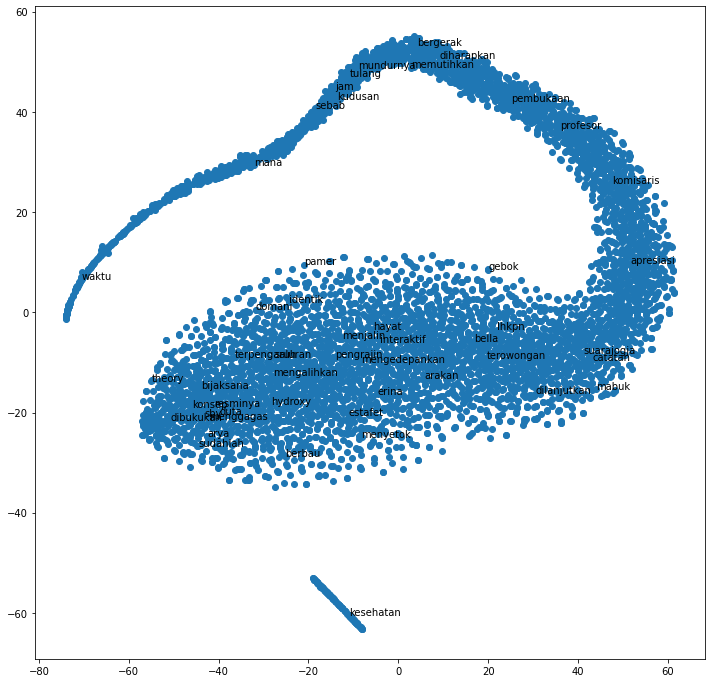

In [ ]:
# model 1
x_vals, y_vals, labels = reduce_dimensions(model1)
plot_with_matplotlib(x_vals, y_vals, labels)

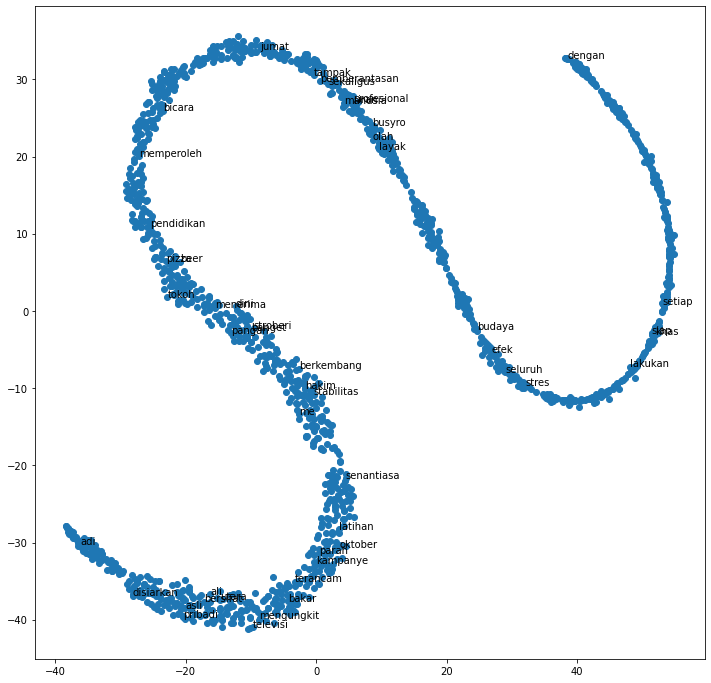

In [ ]:
# model 2
x_vals, y_vals, labels = reduce_dimensions(model2)
plot_with_matplotlib(x_vals, y_vals, labels)